In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy import linalg as LA

Из явной схемы Эйлера получаем:
$$
y^{n+1}_m = y^n_m - \tau\Bigg( \frac{y^n_{m+1} - y^n_{m-1}}{2h} \Bigg)
$$
Из схемы Лакса-Вендроффа:
$$
y^{n+1}_m = y^n_m - \tau \Bigg(\frac{y^n_{m+1} - y^n_{m-1}}{2h} -\frac{\tau}{2}\frac{y^n_{m+1} - 2y^n_m + y^n_{m-1}}{h^2}     \Bigg)
$$
Для рассчета точек на краю будем использовать полностью симметричную схему и из нее получим:
$$
y^{n+1}_{m+1} = \frac{\frac{y^{n}_{m}+y^{n}_{m+1} - y^{n+1}_m}{\tau} + \frac{y^{n}_m + y^{n+1}_{m} - y^n_{m+1}}{h}}{\Big(\frac{1}{\tau} + \frac{1}{h}\Big)}
$$

In [3]:
#Точное решение при T = 9
def f(x):
    if x <= 5:
        return 1
    else:
        return 0

In [42]:
#Параметры сетки, число Куранта 1.0
dx = 0.125
dt = 0.6*dx
T_max = 9 
M_max = 20
N = int(T_max/dt)
M = int(M_max/dx)

In [43]:
#Начальные данные(время, коорндината)
#Эйлер
y_ei = np.zeros((N+1,M+1))
for j in range(int(5/dx) +1):
    y_ei[0][j] = 1
for i in range(N+1):
    y_ei[i][0] = 1
#Лакс-Вендарофф
y_lak = np.zeros((N+1,M+1))
for j in range(int(5/dx) +1):
    y_lak[0][j] = 1
for i in range(N+1):
    y_lak[i][0] = 1

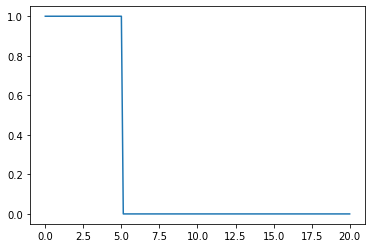

In [44]:
x = np.arange(0,20.0000001,dx)
plt.plot(x,y_ei[0])

In [45]:
#Эйлер:
for i in range(N):
    for j in range(1,M):
        y_ei[i+1][j] = y_ei[i][j] - dt*(y_ei[i][j+1] - y_ei[i][j-1])/(2*dx)
    y_ei[i+1][M] = ((y_ei[i][M] - y_ei[i+1][M-1] - y_ei[i][M-1])/(2*dt) + (y_ei[i+1][M-1] - y_ei[i][M] - y_ei[i][M-1])/(dx))/(1/(2*dt)+1/(dx))

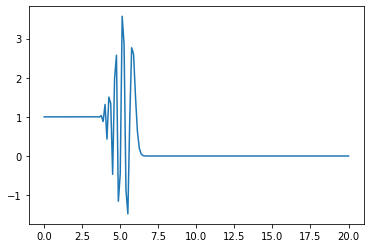

In [46]:
plt.plot(x,y_ei[18])

In [47]:
#Лакс-Вендорфф:
for i in range(N):
    for j in range(1,M):
        y_lak[i+1][j] = y_lak[i][j] - dt*((y_lak[i][j+1] - y_lak[i][j-1])/(2*dx) - dt*(y_lak[i][j-1] - 2*y_lak[i][j] + y_lak[i][j+1])/(2*(dx**2)))
    y_lak[i+1][M] = ((y_lak[i][M-1] + y_lak[i][M] - y_lak[i+1][M])/(dt) + (y_lak[i][M-1] - y_lak[i][M] + y_lak[i+1][M])/(dx))/(1/(dt)+1/(dx))

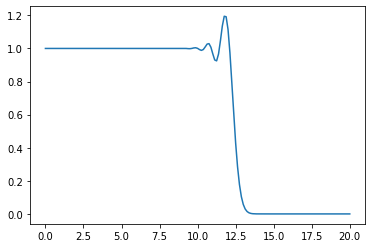

In [54]:
plt.plot(x,y_lak[100])

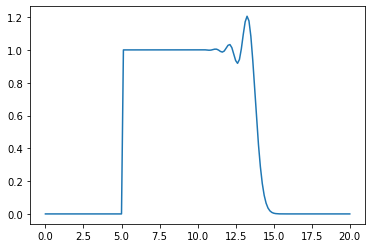

In [49]:
vf = np.vectorize(f)
plt.plot(x,y_lak[N]-vf(x))

In [50]:
#Истиное решение на нужной решетке
y_real = np.zeros((N+1,M+1))
for i in range(N+1):
    y_real[i] = vf(x+(N-i)*dt) 

In [51]:
sum = 0
for i in range(N+1):
    for j in range(M+1):
        sum += (y_lak[i][j]-y_real[i][j])**2
sum = sum**(1/2)
sum*dt*dx

0.83144972686013

Заметим, что спектральный метод для метода Элейра дает нам следующий спектр:
$$
\lambda = 1 - i \sigma \sin \varphi
$$
В то время как для схемы Лакса-Вендроффа
$$
\lambda = 1 - i\sigma \sin \varphi + \sigma^2(\cos \varphi -1) 
$$
Тоесть схема Эйлера в данном случае устойчивостью не обладает, а схема Лакса-Вендроффа устойчива при:
$$
\sigma \leq 1
$$

3.39
1.67
0.83

In [254]:
def g(x,a):
    if (x >= a-4):
        return 1/(1+math.e**(2*(x-a)))
    else:
        return 1

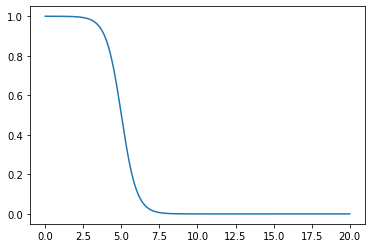

In [255]:
x_prob = np.arange(0,20.00001,0.001)
y_prob = np.array([g(l,5) for l in x_prob])
plt.plot(x_prob,y_prob)

In [265]:
#Параметры сетки, число Куранта 1.0
dx = 0.5
dt = 0.6*dx
T_max = 9 
M_max = 20
N = int(T_max/dt)
M = int(M_max/dx)

In [266]:
#Лакс-Вендарофф нач данные
y_lak = np.zeros((N+1,M+1))
for j in range(int(5/dx) +1):
    y_lak[0][j] = g(dx*j,5)
for i in range(N+1):
    y_lak[i][0] = 1

In [267]:
#Лакс-Вендорфф:
for i in range(N):
    for j in range(1,M):
        y_lak[i+1][j] = y_lak[i][j] - dt*((y_lak[i][j+1] - y_lak[i][j-1])/(2*dx) - dt*(y_lak[i][j-1] - 2*y_lak[i][j] + y_lak[i][j+1])/(2*(dx**2)))
    y_lak[i+1][M] = ((y_lak[i][M-1] + y_lak[i][M] - y_lak[i+1][M])/(dt) + (y_lak[i][M-1] - y_lak[i][M] + y_lak[i+1][M])/(dx))/(1/(dt)+1/(dx))

In [268]:
plt.plot(x,y_lak[120])

IndexError: index 120 is out of bounds for axis 0 with size 31

In [269]:
#Истиное решение на нужной решетке
y_real = np.zeros((N+1,M+1))
for i in range(N+1):
    for j in range(M+1):
        y_real[i][j] = g(j*dx,5+dt*i)

In [270]:
sum = 0
for i in range(N+1):
    for j in range(M+1):
        sum += (y_lak[i][j]-y_real[i][j])**2
sum = sum**(1/2)
sum

1.594249288117069